In [8]:
from util import *
from generation import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [9]:
conciliation_quota  = 0.5

critical_amount     = 100

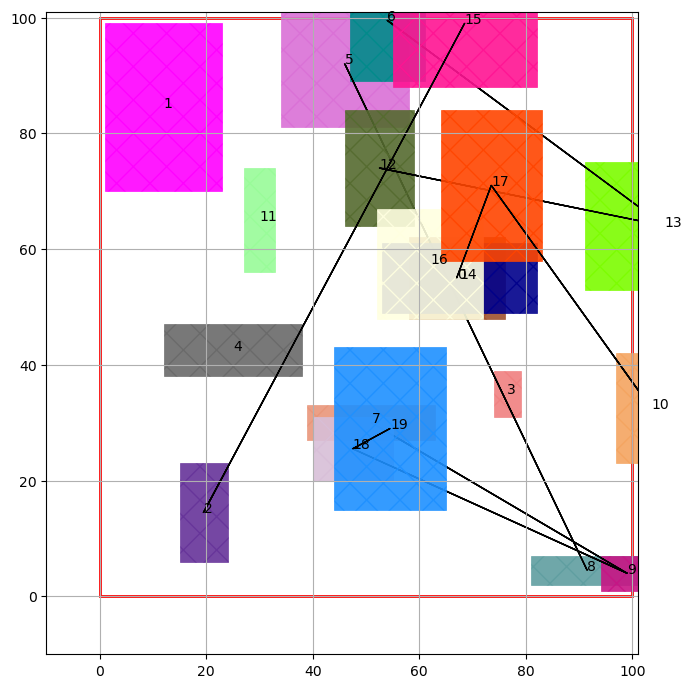

In [10]:
# #Random
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
# participants        = generate_unconnected_participants(20, layout_zone, 30, 30, 666)
# ds_goal             = 10.0

#Random with nets
layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
participants        = generate_connected_participants(20, 10, 3, layout_zone, 30, 30, 666)
ds_goal             = 10.0

# # Perfect square
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 100, "height" : 100}
# participants        = generate_unconnected_equal_quadratic_participants(9, layout_zone, 31, 420)
# ds_goal             = 0.48

# # Wheel
# layout_zone         = {"xmin"   : 0, "ymin"   : 0, "width"  : 300, "height" : 300}
# participants        = generate_unconnected_wheel_participants(layout_zone, 100, 42) 
# ds_goal             = 0.48


plot_size           = 1.01 * layout_zone["width"]


a = plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections= True)


In [11]:
participants            = determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

print('Participant Area: ' + str(calculate_all_participants_area(participants)))

Participant Area: 6292


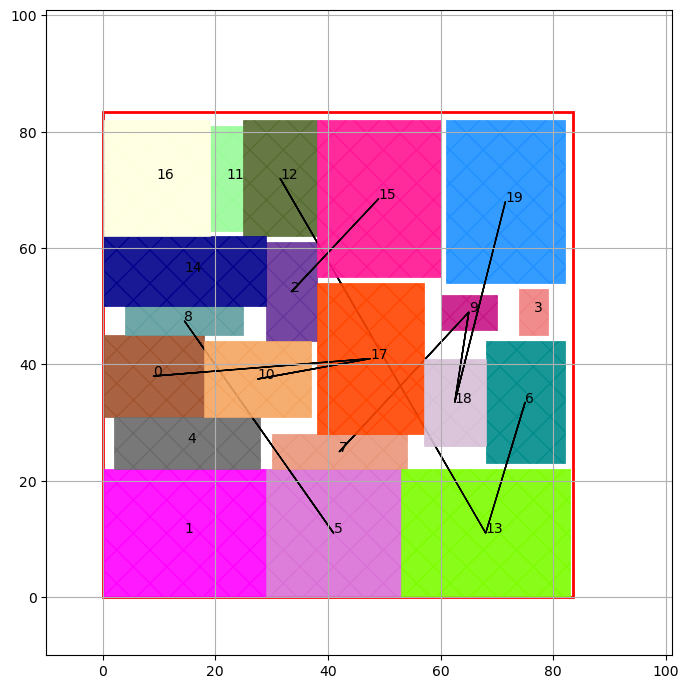

Current deadspace : 9.651341517872964 %


In [12]:
id_list = [p['idx'] for p in (participants.values())]

for i in range(500): # maximum rounds of interaction

    participants    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, plot_size, plot_size, plot_connections=True)

    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    #print(participants['0']['interference'])
    #print(participants['0']['relaxed-connections'])
    #print(last_moves)

    if moves.count('linger')  == len(participants):    

        ds = calculate_dead_space(participants, layout_zone)  

        print('Current deadspace : ' + str(ds) + ' %') 

        if ds < ds_goal:
            break

        layout_zone         = scale_layout_zone(layout_zone, 0.99) 

        participants        = reset_after_tightening(participants)

    for i in range(len(participants)):
        print(participants[str(i)]['last-move'])


In [13]:
participants    	= determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

for i in range(len(participants)):
    print(participants[str(i)]['overlap-with-idx'])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [14]:
ds = calculate_dead_space(participants, layout_zone)

print("Dead Space: " + str(ds) + " %")

Dead Space: 9.651341517872964 %
